In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    roc_curve,
    roc_auc_score
)
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv("C:/Users/autad/OneDrive/Desktop/ML/diabetes.csv", header=None, names=col_names)

In [20]:
print("First 5 rows:")
print(pima.head())

print("\nDataset Info:")
print(pima.info())

print("\nMissing values:")
print(pima.isnull().sum())

First 5 rows:
      pregnant  glucose             bp           skin  insulin   bmi  \
0  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI   
1            6      148             72             35        0  33.6   
2            1       85             66             29        0  26.6   
3            8      183             64              0        0  23.3   
4            1       89             66             23       94  28.1   

                   pedigree  age    label  
0  DiabetesPedigreeFunction  Age  Outcome  
1                     0.627   50        1  
2                     0.351   31        0  
3                     0.672   32        1  
4                     0.167   21        0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   pregnant  769 non-null    object
 1   glucose   769 non-null    object
 2   bp        769

In [23]:
# feature_cols = ['glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age']
# x = pima.drop('label',axis=1)
# y = pima['label']
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

# 2. Convert relevant columns to numeric (assuming 'pima' is your DataFrame)
pima['glucose'] = pd.to_numeric(pima['glucose'], errors='coerce')
pima['label'] = pd.to_numeric(pima['label'], errors='coerce')
# 3. Drop missing values
pima = pima.dropna(subset=['glucose', 'label'])

In [24]:
X = pima[['glucose']]
y = pima['label']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# 7. Predict on test set
y_pred = model.predict(X_test)

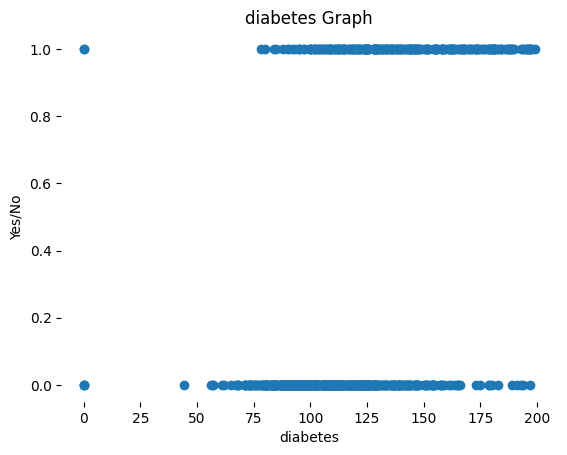

In [30]:
plt.scatter(pima['glucose'], y)
plt.title('diabetes Graph')
plt.xlabel('diabetes')
plt.ylabel('Yes/No')
plt.box(False)
plt.show()

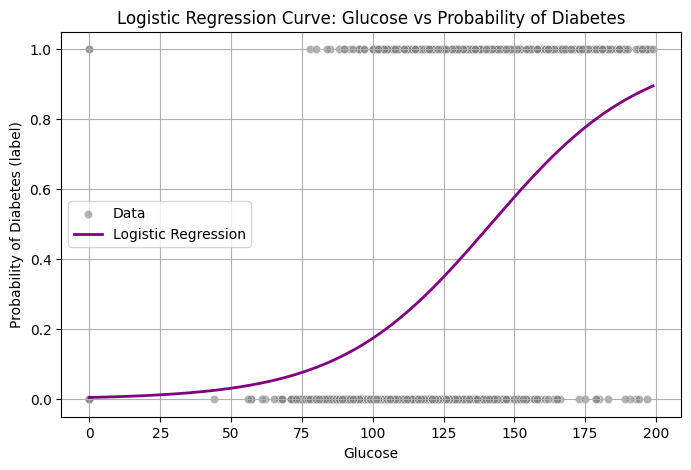

In [31]:
# 9. Plot scatterplot + logistic regression curve
# Generate a range of glucose values
glucose_range = np.linspace(pima['glucose'].min(), pima['glucose'].max(), 300).reshape(-1, 1)
glucose_range_df = pd.DataFrame(glucose_range, columns=['glucose'])
predicted_probs = model.predict_proba(glucose_range_df)[:, 1]


# Plot actual points
plt.figure(figsize=(8, 5))
sns.scatterplot(x='glucose', y='label', data=pima, color='grey', alpha=0.6, label='Data')

# Plot logistic regression line
plt.plot(glucose_range, predicted_probs, color='purple', linewidth=2, label='Logistic Regression')

# Styling
plt.title('Logistic Regression Curve: Glucose vs Probability of Diabetes')
plt.xlabel('Glucose')
plt.ylabel('Probability of Diabetes (label)')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[86, 13],
       [25, 30]])

In [37]:
single_value = pd.DataFrame([[80]], columns=['glucose'])

# Predict
y_pred = model.predict(single_value)

print("Predicted label for glucose = 145:")
print(y_pred[0])

Predicted label for glucose = 145:
0.0


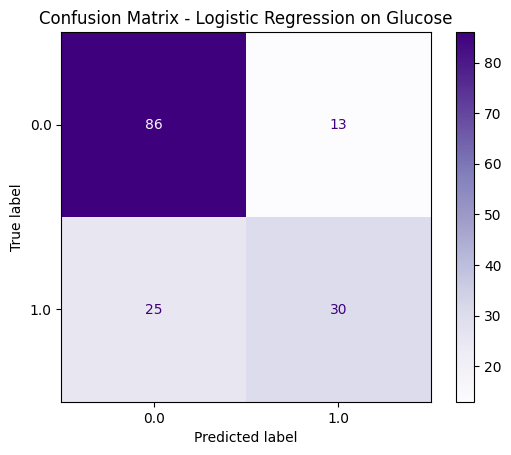

In [27]:
# 8. Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Purples')
plt.title("Confusion Matrix - Logistic Regression on Glucose")
plt.show()